In [27]:
import numpy as np
import pandas as pd    # needed to read the csv data file
import matplotlib.pyplot as plt
import matplotlib
import math
#import datetime
from datetime import datetime
import csv
#import scipy
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import savgol_filter


def loaddatdata(Filename,N_header_rows):

    ENCME="ISO-8859-1"

    header_data=pd.read_csv(Filename,nrows=N_header_rows, sep ="\t",header=None,encoding = ENCME)
    Col_header_alias=pd.read_csv(Filename,skiprows=N_header_rows,nrows=1, sep ="\t",header=None,encoding = ENCME)
    Col_header_ch_name=pd.read_csv(Filename,skiprows=N_header_rows+1,nrows=1, sep ="\t",header=None,encoding = ENCME)
    Col_header_unit=pd.read_csv(Filename,skiprows=N_header_rows+2,nrows=1, sep ="\t",header=None,encoding = ENCME)
    Col_header_alias[1]='data_index'
    Col_header_alias[0]='one'
    Col_header_alias[2]='logname'
    Col_header_alias[3]='T'
    Col_header_arr=Col_header_alias.values.tolist()[0]
    #print(Col_header_arr)
    #col_names=['TIME', 'X', 'Y', 'Z'] 
    custom_date_parser = lambda x: datetime.strptime(x, "%Y/%m/%d %H:%M:%S:.%f")



    cycler_data=pd.read_csv(Filename,skiprows=N_header_rows+3, sep ="\t", header=None,names=Col_header_arr,parse_dates={'timestamp':['Date','Time']},date_parser=custom_date_parser,encoding = ENCME) # 

    return cycler_data,Col_header_arr,header_data;
# cycler_data=[]
# with open('Fresh Pack/BatteryLab_D29_M9_Y2021_T09_41_11.dat', newline = '') as games:
                                                                                              
#     game_reader = csv.DictReader(games, delimiter='\t')
#     for game in game_reader:
#         games_list.append(dict(game))

Filename='Fresh Pack/BatteryLab_D29_M9_Y2021_T09_41_11.dat'
Filename_drivelog='Fresh Pack/DriveLog_D30_M9_Y2021_T04_53_03.dat'

Filename='Fresh Pack/HPPC/BatteryLab_D3_M10_Y2021_T09_23_48.dat'
Filename_drivelog='Fresh Pack/HPPC/DriveLog_D2_M10_Y2021_T05_37_51.dat'

# HPPC data
Filename='Aged Pack 2/BatteryLab_D8_M10_Y2021_T11_07_08.dat'
Filename_drivelog='Aged Pack 2/DriveLog_D6_M10_Y2021_T00_09_12.dat'

Filename='Aged Pack 2/BatteryLab_D4_M10_Y2021_T10_28_14.dat'

Filename='Aged Pack 2/BatteryLab_D13_M10_Y2021_T13_04_21.dat'
Filename='Aged Pack 2/BatteryLab_D14_M10_Y2021_T21_35_22.dat'

Filename='Aged Pack 2/BatteryLab_D15_M10_Y2021_T11_46_40.dat'

Filename='Aged Pack 2/BatteryLab_D18_M10_Y2021_T11_30_15.dat'

# HPPC test
#Filename='Aged Pack 2/BatteryLab_D19_M10_Y2021_T21_32_28.dat'

#Filename='Aged Pack 2/BatteryLab_D19_M10_Y2021_T22_29_49.dat'

#Filename='Aged Pack 2/BatteryLab_D19_M10_Y2021_T22_29_49.dat' #Initialcharge relaxation pusle.

#Filename='Aged Pack 2/BatteryLab_D19_M10_Y2021_T21_32_28.dat' #HPPC data (uses the old header format with 35 rows.)
Filename='Aged Pack 2/BatteryLab_D22_M10_Y2021_T14_41_50.dat' #charge-discharge on fresh cell.
Filename_drivelog='Aged Pack 2/DriveLog_D22_M10_Y2021_T14_44_59.dat' #initial pulse data
Filename_drivelog='Aged Pack 2/DriveLog_D20_M10_Y2021_T22_11_21.dat' #Charge and pulse data
Filename_drivelog='Aged Pack 2/DriveLog_D19_M10_Y2021_T19_32_28.dat' #HPPC data


Filename='Fresh Pack/BatteryLab_D25_M10_Y2021_T10_31_21.dat' #charge-discharge on fresh cell.
#Filename_drivelog='Fresh Pack/DriveLog_D22_M10_Y2021_T14_44_59.dat' #initial pulse data
Filename_drivelog='Fresh Pack/DriveLog_D23_M10_Y2021_T14_49_16.dat' #Charge and pulse data 
#Filename_drivelog='Fresh Pack/DriveLog_D26_M10_Y2021_T16_38_02.dat' #HPPC data


Filename='Aged Pack 3/BatteryLab_D30_M10_Y2021_T02_00_08.dat' #charge-discharge on fresh cell.
#Filename_drivelog='Aged Pack 3/DriveLog_D27_M10_Y2021_T11_21_18.dat'#initial pulse data 
#Filename_drivelog='Aged Pack 3/DriveLog_D28_M10_Y2021_T08_37_57.dat' #Charge and pulse data
Filename_drivelog='Aged Pack 3/DriveLog_D31_M10_Y2021_T08_06_49.dat' #HPPC data


# New file split for later data. 
Filename='Aged Pack 4/BatteryLab_D4_M11_Y2021_T04_50_12.dat' #charge-discharge Low rate data  (This data has a bug with Daylight savings time?)
#Filename='Aged Pack 4/BatteryLab_D5_M11_Y2021_T14_20_12.dat' #HPPC data
#Filename_drivelog='Aged Pack 4/DriveLog_D1_M11_Y2021_T11_37_04.dat'#initial pulse data 
#Filename_drivelog='Aged Pack 4/DriveLog_D2_M11_Y2021_T09_41_35.dat ' #Charge and pulse data
#Filename_drivelog='Aged Pack 4/DriveLog_D4_M11_Y2021_T04_50_39.dat' #unknown? hiccup in data?
Filename_drivelog='Aged Pack 4/DriveLog_D5_M11_Y2021_T10_56_52.dat' #HPPC



# Filename='Aged Pack 5/BatteryLab_D8_M11_Y2021_T03_48_11.dat' #charge-discharge Low rate data  (This data has a bug with Daylight savings time?)
# #Filename='Aged Pack 5/BatteryLab_D9_M11_Y2021_T11_54_53.dat' #HPPC data
# Filename_drivelog='Aged Pack 5/DriveLog_D5_M11_Y2021_T14_21_54.dat'#initial pulse data 
# #Filename_drivelog='Aged Pack 5/DriveLog_D6_M11_Y2021_T11_01_59.dat' #Charge and pulse data
# #Filename_drivelog='Aged Pack 5/DriveLog_D8_M11_Y2021_T03_48_35.dat' #unknown? hiccup in data?

#Filename_drivelog='Aged Pack 5/DriveLog_D9_M11_Y2021_T09_54_53.dat' #HPPC data

# Dead cell
#Filename='Dead Cell 1/BatteryLab_D10_M11_Y2021_T10_34_35.dat' 



#N_header_rows=35 # old data format
N_header_rows=16# new data format 10/20/2021
cycler_data,Col_header_arr,header_data=loaddatdata(Filename,N_header_rows)
cycler_data_drivelog,head_arr_drivelog,header_data_drivelog=loaddatdata(Filename_drivelog,11)
#print(header_data[0][14])

#cycler_data.info()
## NB/
## position << this is a list of the locations of the datetime column within the larger dataframe
## df.iloc[0, position] << this is the first (0) position in the list of positions
## df.iloc[1:, position] << this is the second (1) to the last position in the list of positions

#
#

# %%


vsCctPartNum=E: N330105   2017 27-49 4-2


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
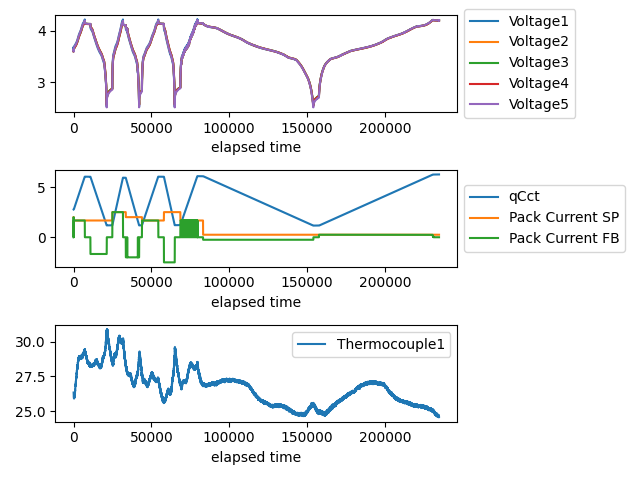

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
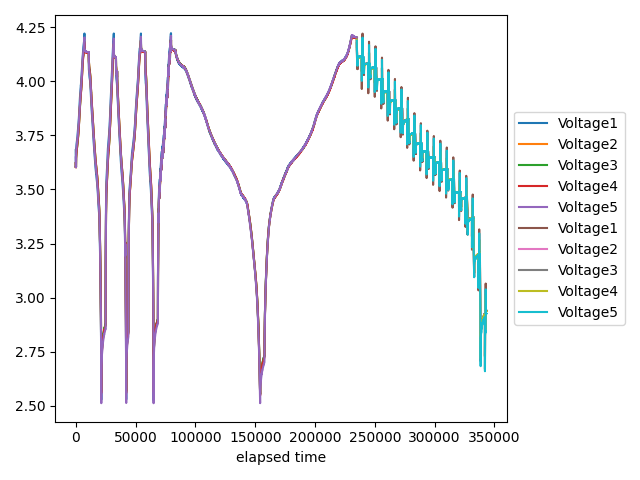

In [28]:
#print(header_data)

cell_serial_number=header_data.iat[14,0]
print(cell_serial_number)
# cycler_data['datetime']=pd.to_datetime(cycler_data['timestamp'], format='%Y/%m/%d %H:%M:%S:.%f') 
# cycler_data.timestamp.head()
# position = cycler_data.columns.get_loc('datetime')
# AA=  cycler_data.timestamp.loc[0]-cycler_data.timestamp.loc[1] #['timestamp'] - cycler_data['timestamp'][0]
# BB=cycler_data.df
elap=cycler_data['timestamp']-cycler_data['timestamp'][0]
cycler_data['elapsed time'] =elap.dt.total_seconds()

elapdl=cycler_data_drivelog['timestamp']-cycler_data['timestamp'][0]
cycler_data_drivelog['elapsed time'] =elapdl.dt.total_seconds()


%matplotlib widget
plt.figure(1)
plt.clf
ax1 = plt.subplot(3, 1, 1)
cycler_data.plot(x='elapsed time',y=['Voltage1','Voltage2','Voltage3','Voltage4','Voltage5'],ax=ax1)
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines[:], labels[:], loc='center left', bbox_to_anchor=(1.0, 0.5))  # legend for first two lines only

ax1 = plt.subplot(3, 1, 2)
cycler_data.plot(x='elapsed time',y=['qCct','Pack Current SP','Pack Current FB'],ax=ax1) #,'numCctControl'
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines[:], labels[:], loc='center left', bbox_to_anchor=(1.0, 0.5))  # legend for first two lines only

# could use num_CCT_Control to pull out parts of the data corresponding to charge or discharge.
ax2 = plt.subplot(3, 1, 3)
cycler_data.plot(x='elapsed time',y=['Thermocouple1'],ax=ax2)
plt.tight_layout()
plt.show()


plt.figure(2)
plt.clf
ax1 = plt.subplot(1, 1, 1)
cycler_data.plot(x='elapsed time',y=['Voltage1','Voltage2','Voltage3','Voltage4','Voltage5'],ax=ax1)
cycler_data_drivelog.plot(x='elapsed time',y=['Voltage1','Voltage2','Voltage3','Voltage4','Voltage5'],ax=ax1)

lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines[:], labels[:], loc='center left', bbox_to_anchor=(1.0, 0.5))  # legend for first two lines only
plt.tight_layout()
plt.show()
# could use num_CCT_Control to pull out parts of the data corresponding to charge or discharge.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
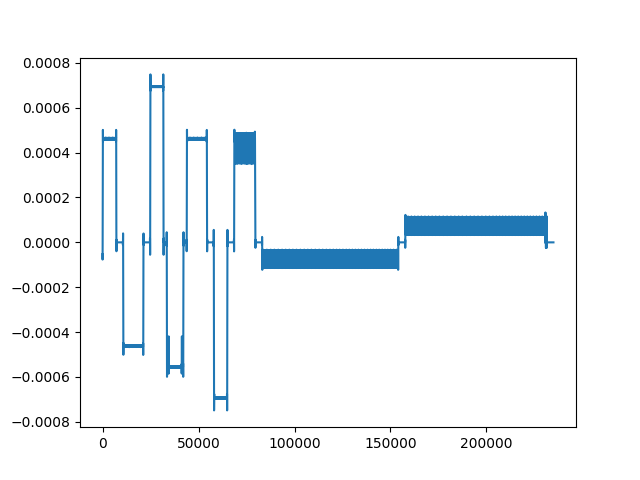

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
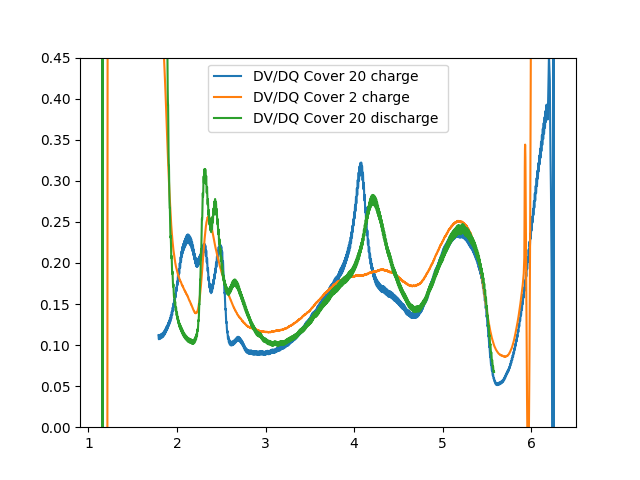

In [29]:
window_length=1551
polyorder=5
Filter_QdataS=savgol_filter(cycler_data['qCct'],window_length,polyorder)
Filter_DQdataS=savgol_filter(cycler_data['qCct'],window_length,polyorder,1)
Filter_VdataS=savgol_filter(cycler_data['Voltage1'],window_length,polyorder)
Filter_DVdataS=savgol_filter(cycler_data['Voltage1'],window_length,polyorder,1)


window_length=351
polyorder=5
Filter_Qdata=savgol_filter(cycler_data['qCct'],window_length,polyorder)
Filter_DQdata=savgol_filter(cycler_data['qCct'],window_length,polyorder,1)
Filter_Vdata=savgol_filter(cycler_data['Voltage1'],window_length,polyorder)
Filter_DVdata=savgol_filter(cycler_data['Voltage1'],window_length,polyorder,1)


plt.figure(3)
plt.clf()
plt.plot(Filter_DQdata)
plt.show()

# find C/20 charge data
indexcover20charge = np.where((cycler_data['Pack Current FB'] > - 0.3 ) & (cycler_data['Pack Current FB'] < - 0.2 ) )
indexCover2charge = np.where((cycler_data['Pack Current FB'] > - 2.6 ) & (cycler_data['Pack Current FB'] < - 2.4 ) )

indexcover20discharge = np.where((cycler_data['Pack Current FB'] <  0.3 ) & (cycler_data['Pack Current FB'] > 0.2 ) )
#indexcover20discharge = np.where((cycler_data['Pack Current FB'] <  0.3 ) & (cycler_data['Pack Current FB'] > 0.2 ) )
indexcover20discharge = np.where((cycler_data['elapsed time'] <  163179 ) & (cycler_data['elapsed time'] > 9.036e4 ) )
indexcover20charge = np.where((cycler_data['elapsed time'] <  293700 ) & (cycler_data['elapsed time'] > 166800 ) )


plt.figure(4)
plt.clf()
ax1 = plt.subplot(1, 1, 1)
plt.plot(Filter_QdataS[indexcover20charge],Filter_DVdataS[indexcover20charge]/Filter_DQdataS[indexcover20charge],label='DV/DQ Cover 20 charge ')
plt.plot(Filter_Qdata[indexCover2charge],Filter_DVdata[indexCover2charge]/Filter_DQdata[indexCover2charge],label='DV/DQ Cover 2 charge ')
plt.plot(Filter_QdataS[indexcover20discharge],Filter_DVdataS[indexcover20discharge]/Filter_DQdataS[indexcover20discharge],label='DV/DQ Cover 20 discharge ' )

lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines[:], labels[:])#, loc='center left', bbox_to_anchor=(1.0, 0.5))  # legend for first two lines only
plt.ylim(0 ,0.45)
plt.show()